In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
rcParams['figure.figsize'] = 15, 6

In [52]:
data = pd.read_csv('C://Users//Anmol//Desktop//Notebooks//Datasets//AirPassengers.csv')
print(data.head())
print('\n Data Types: ',data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:  Month          object
#Passengers     int64
dtype: object


In [53]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('C://Users//Anmol//Desktop//Notebooks//Datasets//AirPassengers.csv',
                  parse_dates=['Month'], index_col='Month', date_parser=dateparse)
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [54]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

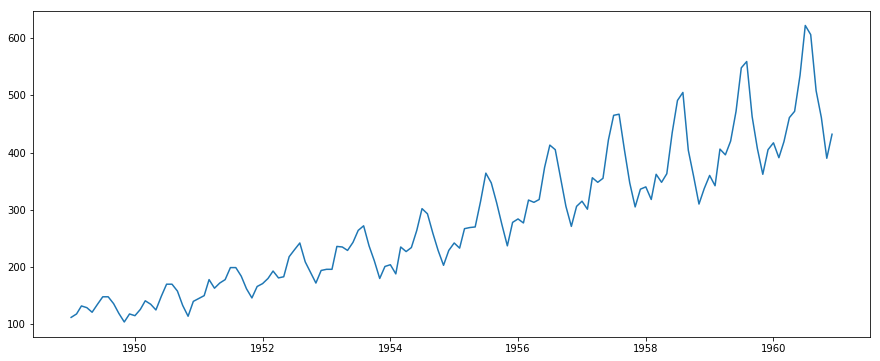

In [55]:
plt.plot(data)

In [56]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    print('Result of Dickey-Fuller test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

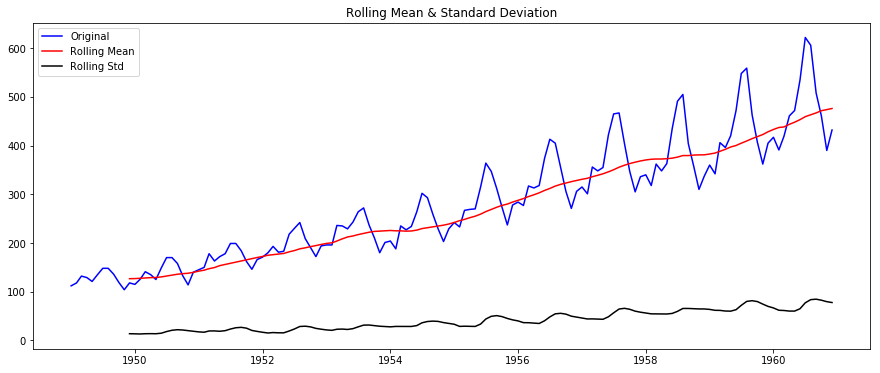

Result of Dickey-Fuller test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [57]:
test_stationarity(ts)

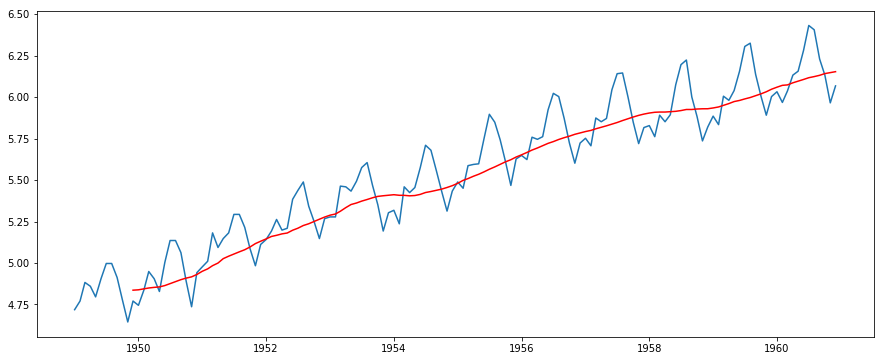

In [58]:
ts_log = np.log(ts)
plt.plot(ts_log)

moving_avg = ts_log.rolling(12).mean()
plt.plot(moving_avg, color='red')

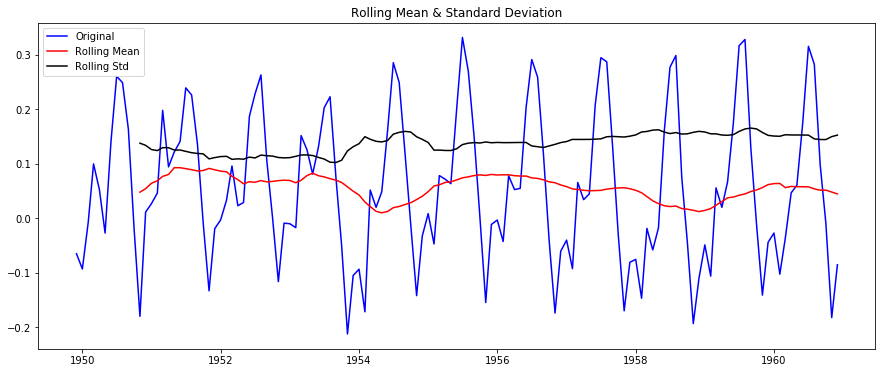

Result of Dickey-Fuller test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [59]:
ts_log_mov_avg_diff = ts_log - moving_avg
ts_log_mov_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_mov_avg_diff)

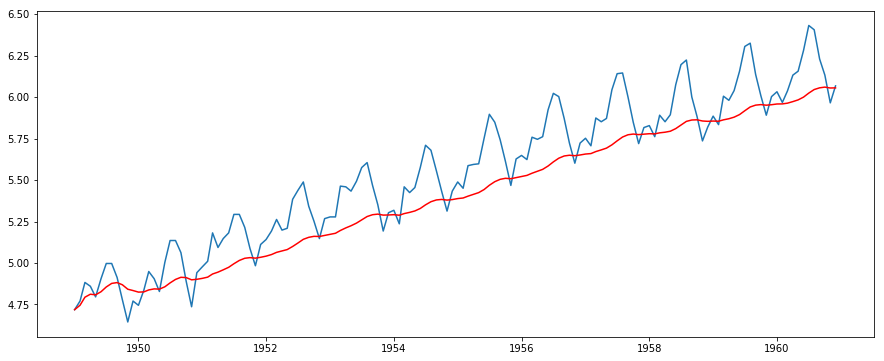

In [60]:
#Exponentially Weighted Moving Average
exp_weighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(exp_weighted_avg, color='red')

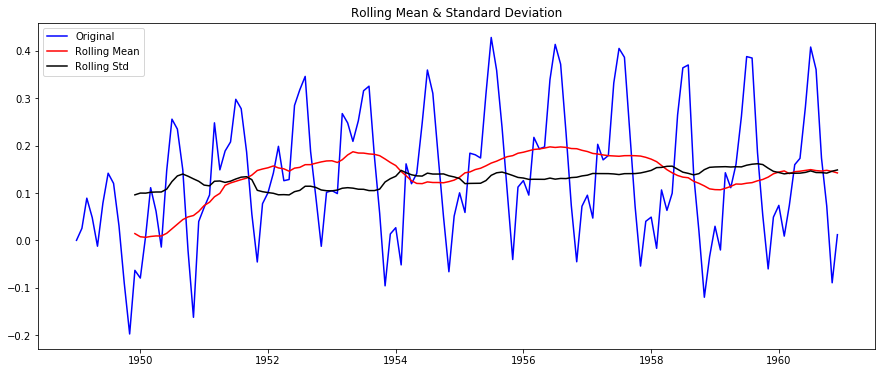

Result of Dickey-Fuller test: 
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [61]:
ts_log_ewma_diff = ts_log - exp_weighted_avg
test_stationarity(ts_log_ewma_diff)

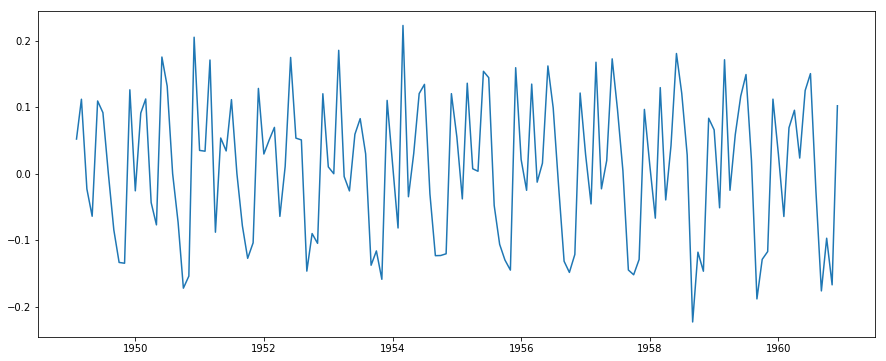

In [62]:
#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

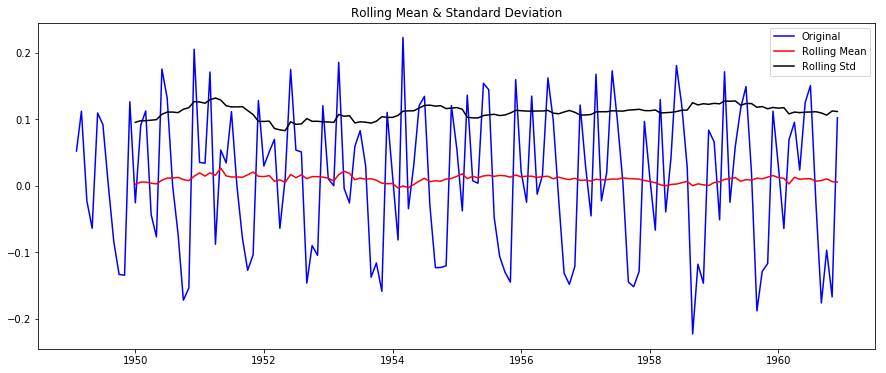

Result of Dickey-Fuller test: 
Test Statistic                  -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [63]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

## Forecasting a Time Series

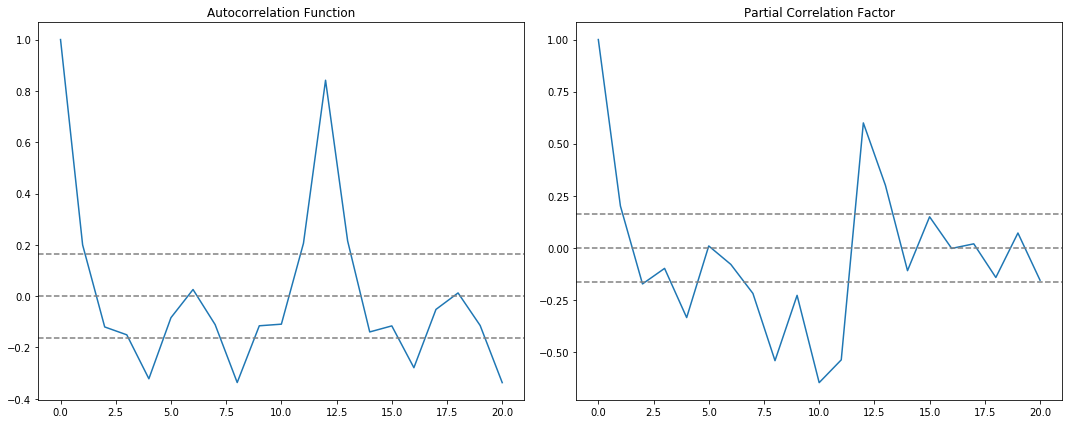

In [64]:
#ACF and PACF Plots:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Correlation Factor')
plt.tight_layout()

C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anmol\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Anmol\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will 

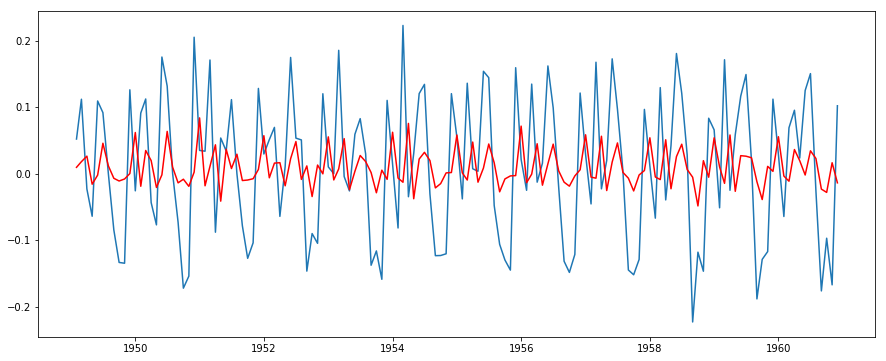

In [65]:
#AR Model
model = ARIMA(ts_log, order=(2,1,0))
results_ar = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ar.fittedvalues, color='red')

C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


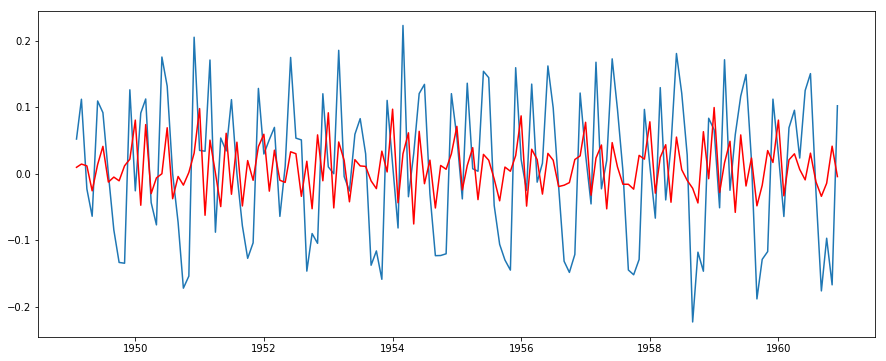

In [66]:
#MA Model
model = ARIMA(ts_log, order=(0,1,2))
results_ma = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ma.fittedvalues, color='red')

C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Anmol\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


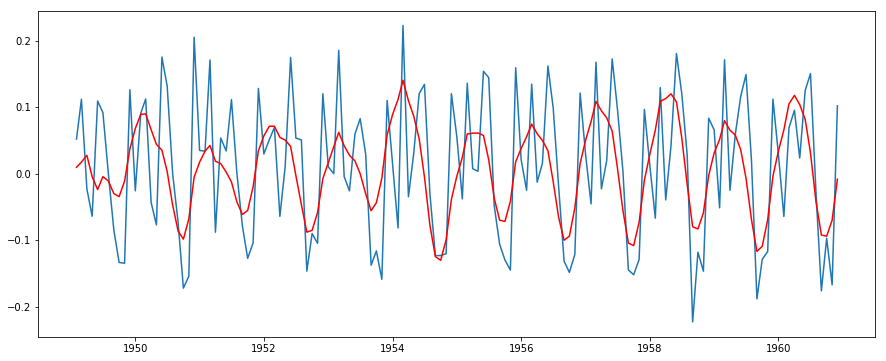

In [67]:
#Combined Model
model = ARIMA(ts_log, order=(2,1,2))
results_arima = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues, color='red')

In [68]:
predicted_arima_diff = pd.Series(results_arima.fittedvalues, copy=True)
predicted_arima_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [69]:
predicted_arima_diff_cumsum = predicted_arima_diff.cumsum()
predicted_arima_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [71]:
predicted_arima_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predicted_arima_log = predicted_arima_log.add(predicted_arima_diff_cumsum, fill_value=0)
predicted_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

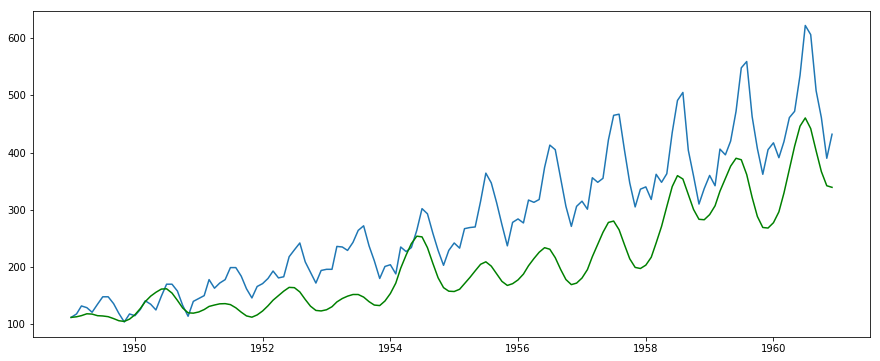

In [72]:
predicted_arima = np.exp(predicted_arima_log)
plt.plot(ts)
plt.plot(predicted_arima, color='green')